In [ ]:
from google.colab import files
files=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix
import seaborn as sns

import sklearn
from sklearn import datasets
from scipy import stats

from IPython.display import set_matplotlib_formats
matplotlib.style.use('ggplot') # Other styles matplotlib.style.available
import os
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
sns.set_context('notebook')
plt.close('all')

## Importamos el dataset

In [ ]:
path = 'Mall_Customers.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

Cambiamos el nombre de las columnas por comodidad

In [ ]:
df.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'Spending_score'}, inplace=True)

### EDA

In [ ]:
df.describe()

,CustomerID,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Tenemos 200 observaciones con clientes de entre 18 y 70 con una media de edad 36 años. Los rangos salariales van de entre 15,000  dólares anuales a 137,000 
dólares anuales con una media de 61,500 dólares. El gasto individual está escalado entre 1 y 99. 

<Axes: xlabel='Age', ylabel='Annual_income'>

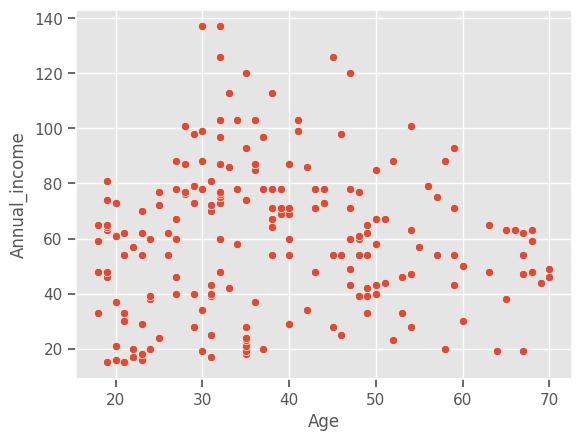

In [ ]:
sns.scatterplot(data=df, x='Age', y='Annual_income')

Vemos una tendencia ascendente a nivel de ingresos anuales desde los 20 a los 35 años. A partir de esa edad, la tendencia es descendiente.

<Axes: xlabel='Age', ylabel='Spending_score'>

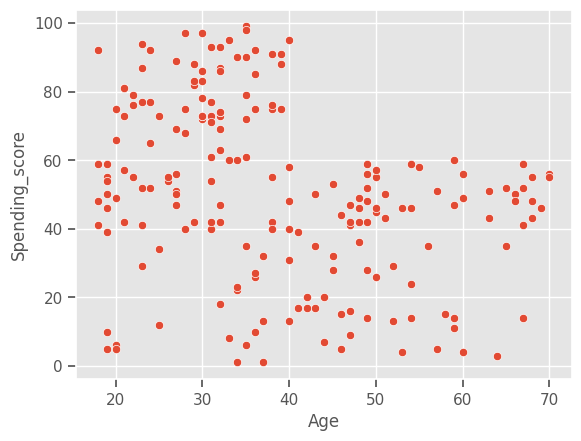

In [ ]:
sns.scatterplot(data=df, x='Age', y='Spending_score')

La gente de entre 20 y 40 años gastan bastante más (i.e. cerca del doble) que la gente mayor de 40 años.

<Axes: xlabel='Annual_income', ylabel='Spending_score'>

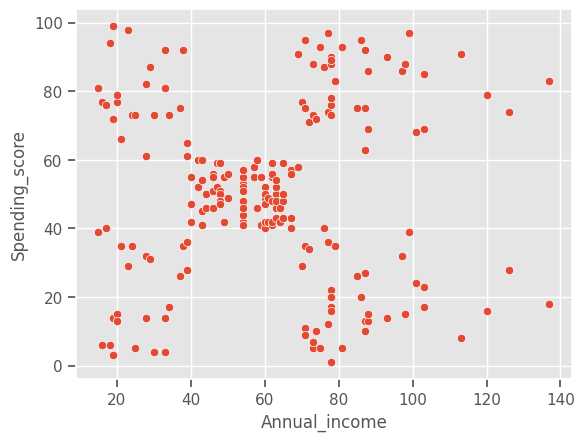

In [ ]:
sns.scatterplot(data=df, x='Annual_income', y='Spending_score')

¿Cuántos clusters veis?

<Axes: >

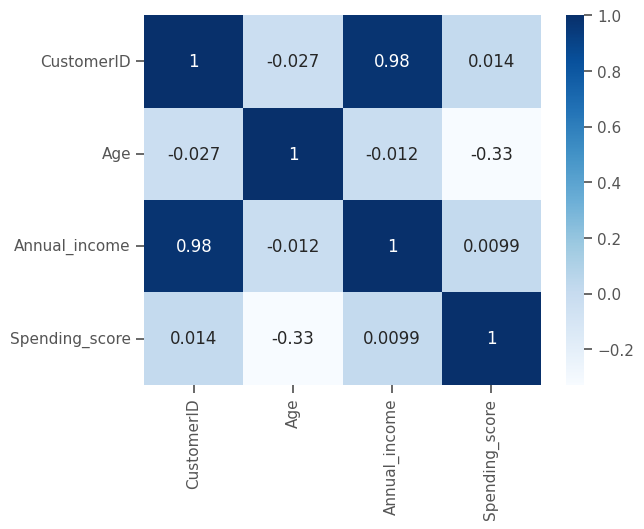

In [ ]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

### Empecemos incluyendo solamente Annual_income y Spending_score como variables dependientes ya que Age no es exactamente numérica.

In [ ]:
X = df.loc[:,['Annual_income', 'Spending_score']].values
print(X.shape)

(200, 2)


### K-Means

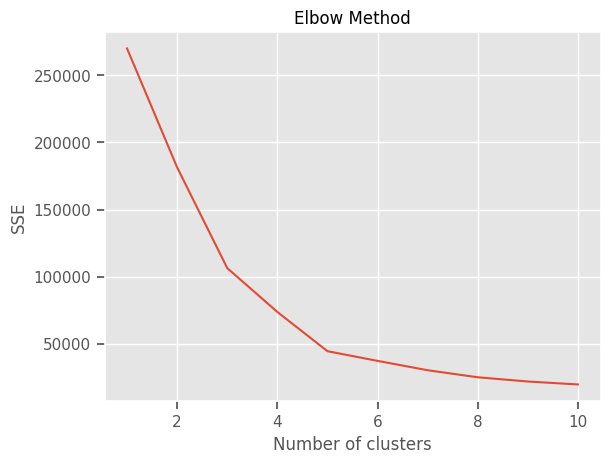

In [ ]:
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Parece que K=5, vamos a comprobarlo

In [ ]:
from sklearn.metrics import silhouette_score

#Calculamos silhouette score medio
score = silhouette_score(X, kmeans.labels_, metric='euclidean')

score

0.45925273534781125

For 2 clusters: average silhouette_score is 0.2968969162503008
For 3 clusters: average silhouette_score is 0.46761358158775435
For 4 clusters: average silhouette_score is 0.4931963109249047
For 5 clusters: average silhouette_score is 0.553931997444648
For 6 clusters: average silhouette_score is 0.53976103063432
For 7 clusters: average silhouette_score is 0.5264283703685728
For 8 clusters: average silhouette_score is 0.45827056882053113


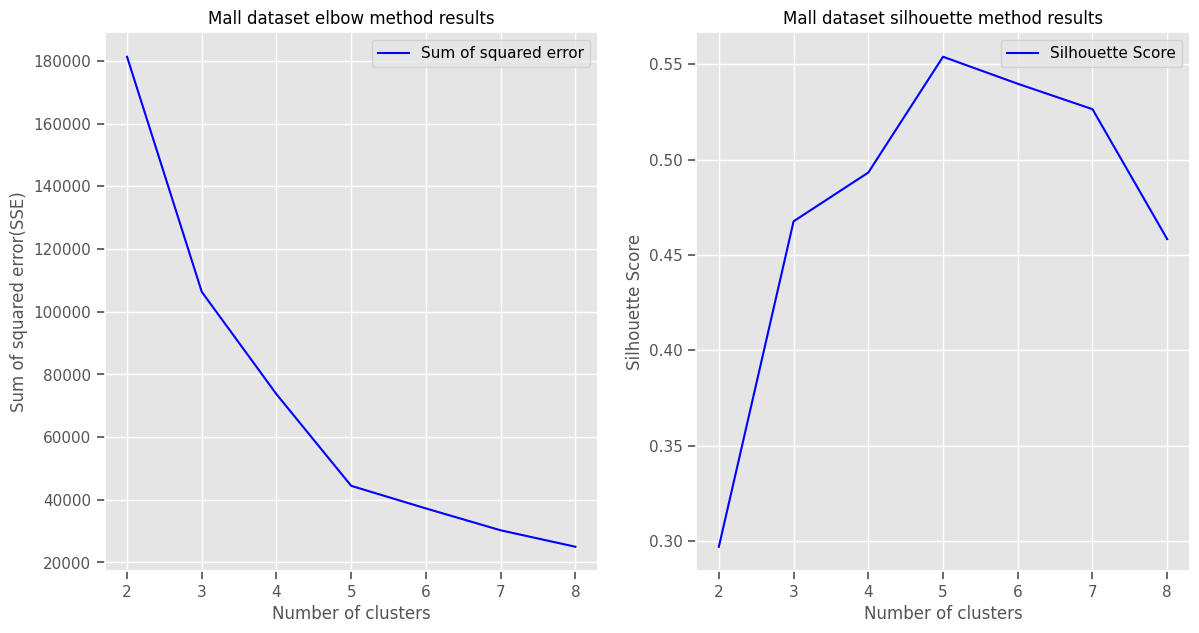

In [ ]:
range_n_clusters = range(2,9)
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
   cluster_labels = clusterer.fit_predict(X)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(X, cluster_labels)
   ss.append(silhouette_avg)
   print(f"For {n_clusters} clusters: average silhouette_score is {silhouette_avg}")
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

fig = plt.figure(figsize=(14,7))

fig.add_subplot(121)
plt.title("Mall dataset elbow method results")
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared error(SSE)")
plt.legend()

fig.add_subplot(122)
plt.title("Mall dataset silhouette method results")
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

En efecto, utilizando solamente Annual_income y Spending_score, K=5 con un silhouette score de 0.554, lo cual no está nada mal.

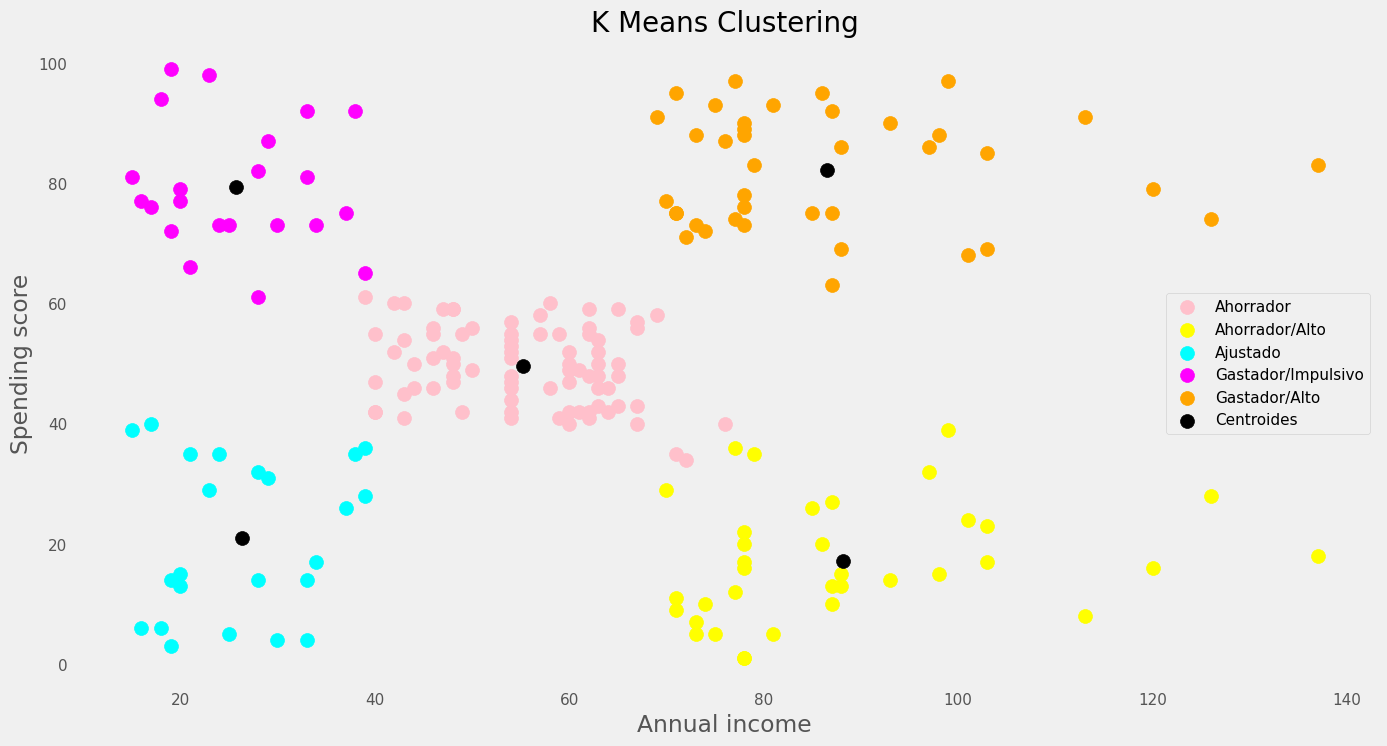

In [ ]:
#Ahora, utilicemos el método fit_predict() para crear nuestros clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(X)

plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('fivethirtyeight')

#Annual income = X[a,0] y Spending score = X[a,1]
#a = cluster code
plt.scatter(X[pred_y == 0,0], X[pred_y == 0,1], s = 100, c ='pink', label='Ahorrador')
plt.scatter(X[pred_y == 1,0], X[pred_y == 1,1], s = 100, c ='yellow', label='Ahorrador/Alto')
plt.scatter(X[pred_y == 2,0], X[pred_y == 2,1], s = 100, c ='cyan', label='Ajustado')
plt.scatter(X[pred_y == 3,0], X[pred_y == 3,1], s = 100, c ='magenta', label='Gastador/Impulsivo')
plt.scatter(X[pred_y == 4,0], X[pred_y == 4,1], s = 100, c ='orange', label='Gastador/Alto')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label = 'Centroides')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize=20)
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.grid()
plt.show()

Veamos cómo de consolidados está cada uno de los clusters.

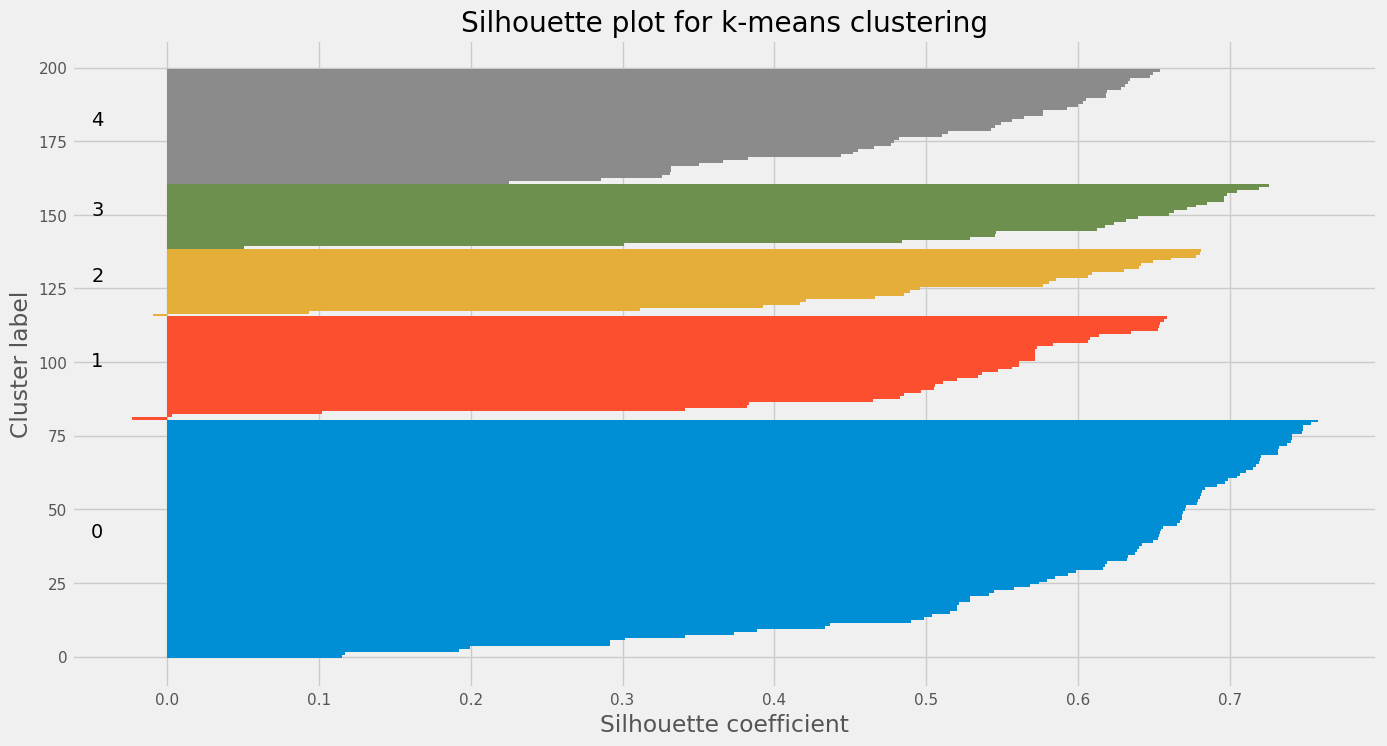

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Calculate silhouette coefficients for each data point
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# Plot silhouette plot
y_lower, y_upper = 0, 0
for i in range(kmeans.n_clusters):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_vals)

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for k-means clustering")
plt.show()

Observamos que el cluster 0 y el 3 son los que más confianza aportan. El 0 es el más grande, seguido por el 4.

In [ ]:
pred_y = pd.DataFrame(pred_y)
df = pd.concat([df, pred_y], axis =1)
df = df.rename(columns = {0:"Cluster"})
df.head()

,CustomerID,Genre,Age,Annual_income,Spending_score,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [ ]:
df['Cluster'].value_counts().sort_values(ascending=False)

0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64

In [ ]:
#df['Cluster'].value_counts().plot(kind='bar')

Veamos la distribución de los IDs.

In [ ]:
for i in range(0,5):
  print('Customer IDs for cluster:', i) 
  print(df[df['Cluster'] == i]['CustomerID'].values)
  print()

Customer IDs for cluster: 0
[ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]

Customer IDs for cluster: 1
[125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

Customer IDs for cluster: 2
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

Customer IDs for cluster: 3
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]

Customer IDs for cluster: 4
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]



### Visualizamos los Clusters

In [ ]:
import plotly.express as px
fig = px.scatter(df, x=df["Annual_income"], y=df["Spending_score"], color=df["Cluster"])
fig.show()

# Probemos a incluir Age

In [ ]:
df2 = pd.read_csv(path)
df2.rename(columns={'Annual Income (k$)':'Annual_income','Spending Score (1-100)':'Spending_score'}, inplace=True)

In [ ]:
a = df2.loc[:,['Age', 'Annual_income', 'Spending_score']].values
print(a.shape)

(200, 3)


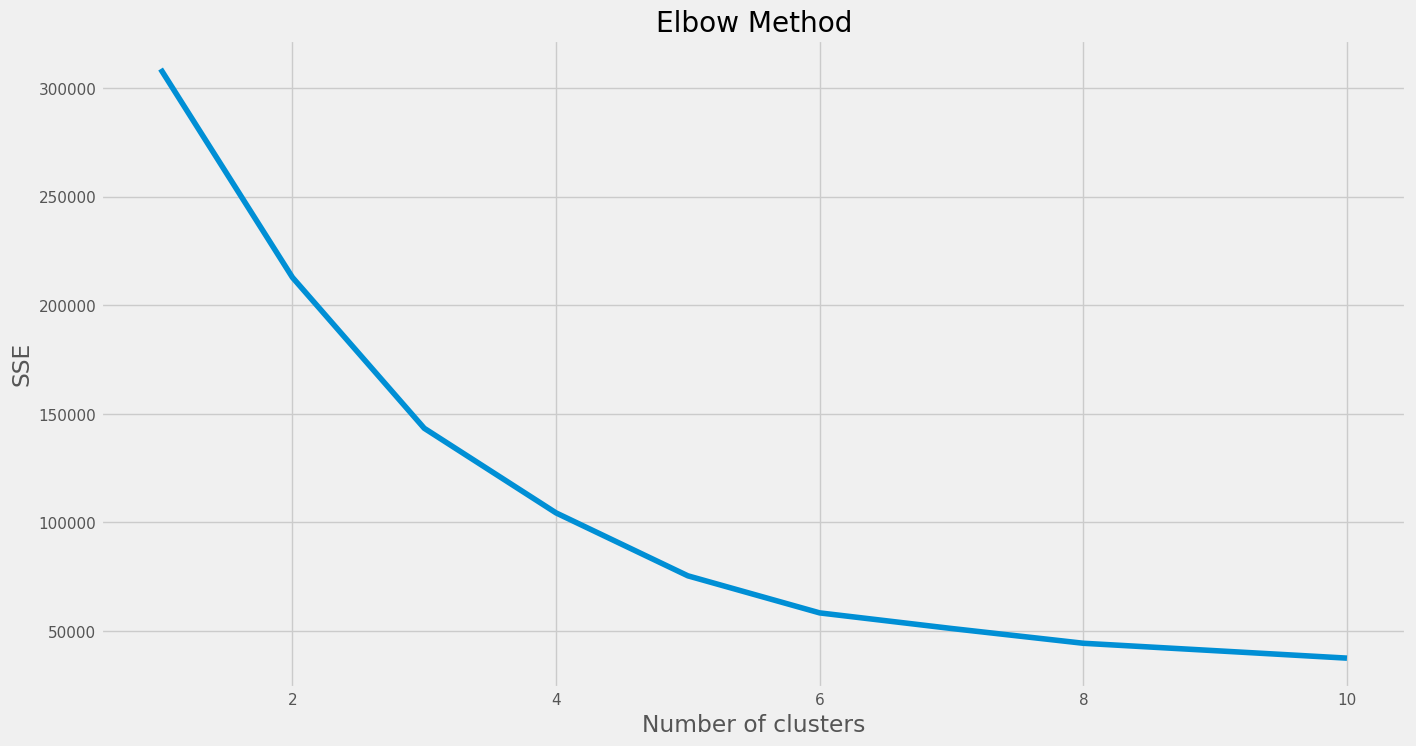

In [ ]:
from sklearn.cluster import KMeans
sse2 = []
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans2.fit(a)
    sse2.append(kmeans2.inertia_)
plt.plot(range(1, 11), sse2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

¿Hmmmm no queda muy claro si K=3, K=5 o K=6, no?

Comprobemos mejor con Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score

#Calculamos silhouette score
score2 = silhouette_score(a, kmeans2.labels_, metric='euclidean')

score2

0.3771617663736055

For 2 clusters: average silhouette_score is 0.293166070535953
For 3 clusters: average silhouette_score is 0.3839349967742105
For 4 clusters: average silhouette_score is 0.40546302077733304
For 5 clusters: average silhouette_score is 0.44446409171786105
For 6 clusters: average silhouette_score is 0.4523566166018854
For 7 clusters: average silhouette_score is 0.4398198217929885
For 8 clusters: average silhouette_score is 0.42977587111050725


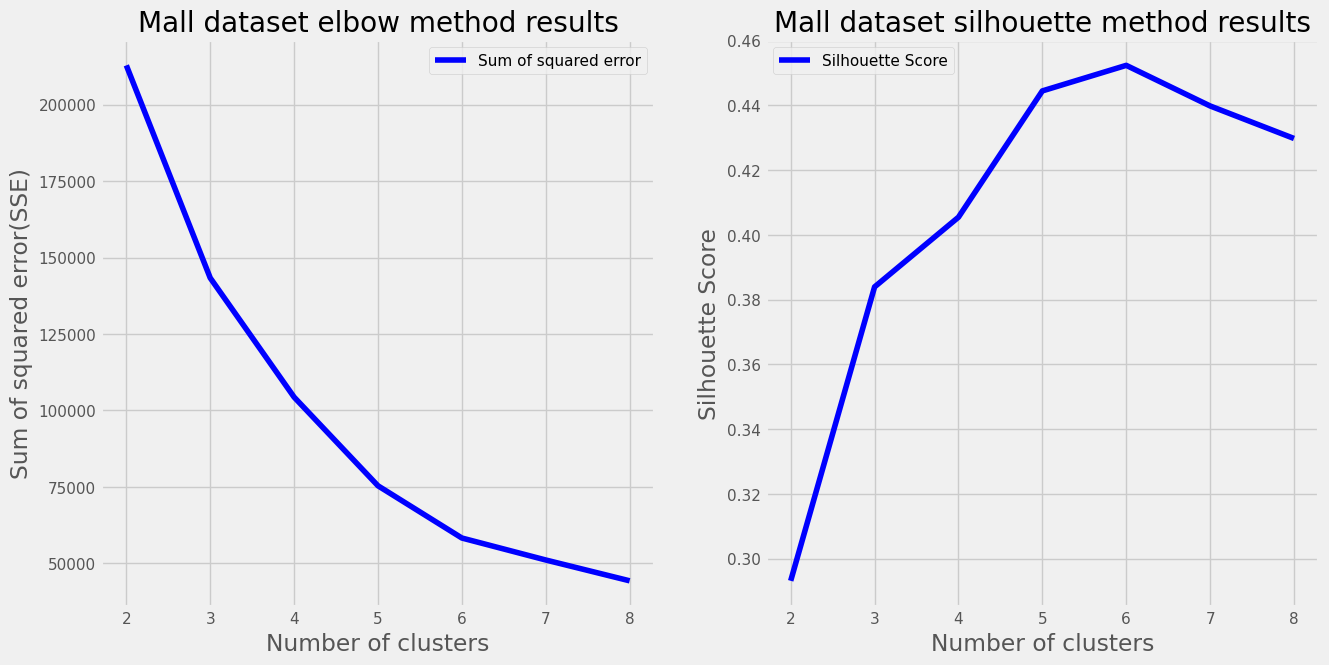

In [ ]:
range_n_clusters = range(2,9)
elbow2 = []
sse2 = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   kmeans2 = KMeans(n_clusters = n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
   cluster_labels2 = kmeans2.fit_predict(a)
   #Finding the average silhouette score
   silhouette_avg2 = silhouette_score(a, cluster_labels2)
   sse2.append(silhouette_avg2)
   print(f"For {n_clusters} clusters: average silhouette_score is {silhouette_avg2}")
   #Finding the average SSE"
   elbow2.append(kmeans2.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

fig = plt.figure(figsize=(14,7))

fig.add_subplot(121)
plt.title("Mall dataset elbow method results")
plt.plot(range_n_clusters, elbow2,'b-',label='Sum of squared error')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared error(SSE)")
plt.legend()

fig.add_subplot(122)
plt.title("Mall dataset silhouette method results")
plt.plot(range_n_clusters, sse2,'b-',label='Silhouette Score')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

Al incluir la edad, somos capaces de diferenciar aún más nuestros clusters, sin embargo obteniendo un silhouette score general menor.

In [ ]:
#Ahora, utilicemos el método fit_predict() para crear nuestros clusters
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y2 = kmeans2.fit_predict(a)

In [ ]:
pred_y2 = pd.DataFrame(pred_y2)
df2 = pd.concat([df2, pred_y2], axis =1)
df2 = df2.rename(columns = {0:"Cluster"})
df2.head()

,CustomerID,Genre,Age,Annual_income,Spending_score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [ ]:
import plotly.express as px
fig = px.scatter(df2, x=df2["Spending_score"], y=df2["Age"], color=df2["Cluster"])
fig.show()

Da la impresión de que estamos asignando un cluster erróneamente pero veámoslo más en detalle.



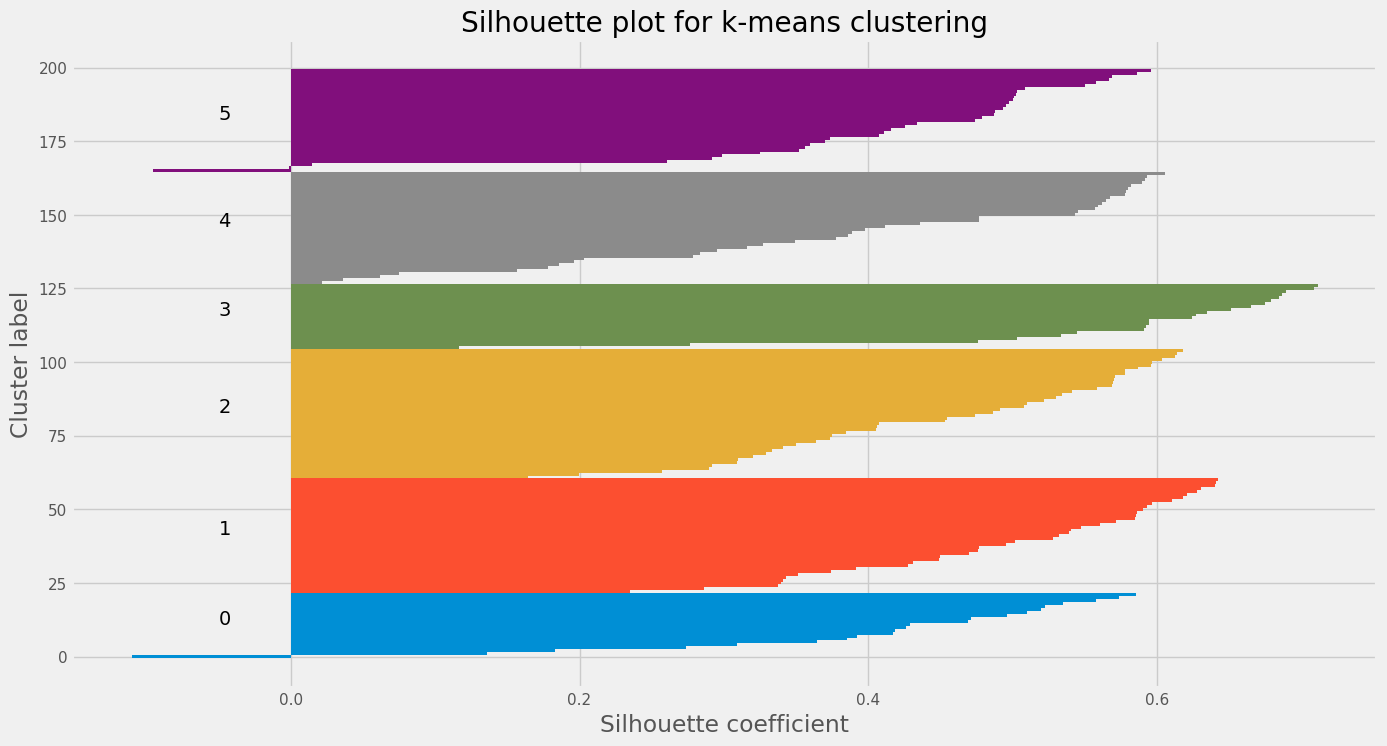

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Calculate silhouette coefficients for each data point
silhouette_vals = silhouette_samples(a, kmeans2.labels_)

# Plot silhouette plot
y_lower, y_upper = 0, 0
for i in range(kmeans2.n_clusters):
    cluster_silhouette_vals = silhouette_vals[kmeans2.labels_ == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_vals)

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for k-means clustering")
plt.show()

A pesar de una bajada media del silhouette score, vemos como hemos ganado mucha más confianza en distintos clusters y hemos conseguido equilibrar el peso de cada uno de ellos. No obstante, en general, nuestro clustering ha empeorado ya que vemos valores negativos en los clusters 0 y 5.

### Visualizamos los clusters

In [ ]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df2, x='Annual_income', y='Spending_score', z='Age', color='Cluster',title="Mall Clustering with 3 variables")
# fig.write_image("Mall_3d.png")
fig.show()

In [ ]:
df2['Cluster'].value_counts().sort_values(ascending=False)

2    44
1    39
4    38
5    35
0    22
3    22
Name: Cluster, dtype: int64

In [ ]:
for i in range(0,6):
  print('Customer IDs for cluster:', i)
  print(df2[df2['Cluster'] == i]['CustomerID'].values)
  print()

Customer IDs for cluster: 0
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]

Customer IDs for cluster: 1
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Customer IDs for cluster: 2
[ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105 107
 108 109 110 111 117 118 119 120]

Customer IDs for cluster: 3
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]

Customer IDs for cluster: 4
[ 44  48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89
  92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125
 133 143]

Customer IDs for cluster: 5
[127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

